## Diabetes Prediction Using Machine Learning
<b> In this article, we will be predicting that whether the patient has diabetes or not on the basis of the features we will provide to our machine learning model, and for that, we will be using the famous Pima Indians Diabetes Database.
    
<b> In this article, we are going to apply 5 model's, i.e. Logistoc Regression, Decision Tree, Random Forest, XgBoost classifier and Support Vector Machine (SVM) and then we will choose the best performing model.
    
<b> In this article, I am using Healthcare dataset as "pima-indians-diabetes.csv".    
    
<b> Saving the best model using pickle to make the prediction from real data.

## Step - 1 : Business Problem Understanding
- <b> predict whether a person has diabetes or not (Outcome), based on information about the patient such as blood pressure, body mass index (BMI), age, Pregnancies, Glucose, SkinThickness, Insulin and DiabetesPedigreeFunction.
    
- <b> On the basis of this data, how should they predict diabetes (Outcome) ? These general questions might lead me to more specific questions :
    
   1. Is there a relationship between each variables (blood pressure, body mass index (BMI), age, Pregnancies, Glucose, SkinThickness, Insulin and DiabetesPedigreeFunction.) and Outcome (predicting whether patient have diabetic or not) ?
   2. How strong is that relationship ?
   3. Which variables contribute to Outcome (predicting whether patient have diabetic or not) ?
   4. What is the effect of each variables on Outcome (predicting whether patient have diabetic or not) ?


### Importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.simplefilter("ignore")

## Step - 2 : Data Understanding
### 2.1 Data Collection
<b>Load the dataset by using read_csv() to read the dataset and save it to the 'diabetes_df' variable and take a look at the first 5 lines using the head() method.

In [2]:
# Load the dataset 
diabetes_df = pd.read_csv('pima-indians-diabetes.csv')

# Display the first 5 lines using the head() method.
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.2 Data Understanding
<b> Let’s have a look at data dimensionality.

In [3]:
diabetes_df.shape

(768, 9)

<b> From the output, we can see that the table contains 768 rows and 9 columns.
    
    
<b> We can use the info() method to output some general information about the dataframe :

In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Class                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<b> int64 and float64 are the data types of our features. We see that 9 features are numeric (7 features are int64 + 2 features are float64). With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 768 observations, the same number of rows we saw before with shape.
    
    
<b> Here 9 variables or features (columns) are there, 9 features are numeric (7 features are int64 + 2 features are float64). The details of these variables as follows :
    
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)2)
- DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- Age: Age (years)
- Class: Class variable (0 if non-diabetic, 1 if diabetic)
    

## Step - 3 : Data Preprocessing
### 3.1 Exploratory Data Analysis (EDA) and Data Cleaning
- <b> On the basis of this data, how should they predict diabetes (Outcome) ? These general questions might lead me to more specific questions :
    
   1. Is there a relationship between each variables (blood pressure, body mass index (BMI), age, Pregnancies, Glucose, SkinThickness, Insulin and DiabetesPedigreeFunction.) and Outcome (predicting whether patient have diabetic or not) ?
   2. How strong is that relationship ?
   3. Which variables contribute to Outcome (predicting whether patient have diabetic or not) ?
   4. What is the effect of each variables on Outcome (predicting whether patient have diabetic or not) ?


<b> Now let’ see that what are columns available in our dataset.

In [5]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class'],
      dtype='object')

<b> The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): count, mean, standard deviation, min, max, median, 0.25 and 0.75 quartiles.

In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<b> Now use the value_counts method on Class variable.

In [7]:
diabetes_df['Class'].value_counts()

0    500
1    268
Name: Class, dtype: int64

<b> 500 persons out of 768 are non-diabetic and 268 are diabetic.

<b> Checking the correlation between variables by using corr().

In [8]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<b> Checking the correlation of every pair of features (and the Outcome variable), and visualize the correlations using a heatmap.

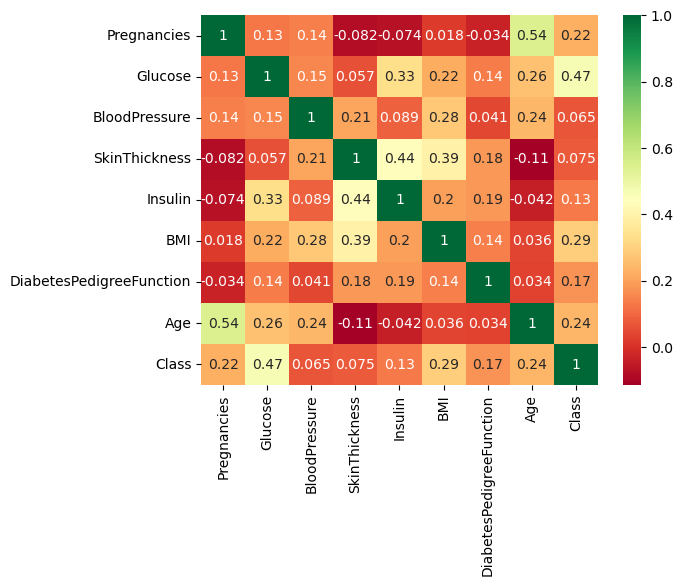

In [9]:
# calculate the correlation between variables and store it in "corr" object.
corr = diabetes_df.corr()

# seaborn has an easy method to showcase heatmap
sns.heatmap(diabetes_df.corr(), annot=True,cmap ='RdYlGn')

# displaying heatmap
plt.show()

- <b> In the above heatmap, brighter colors indicate more correlation. As we can see from the table and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable. Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

- <b> The relationship between dependent (Outcome) and independent (blood pressure, body mass index (BMI), age, Pregnancies, Glucose, SkinThickness, Insulin and DiabetesPedigreeFunction) variables should be high. The higher relationship gives the stronger the correlation and accuracy.
    
- <b> The relationship between any two independent variables should be low, it will gives the low accuracy.


<b> Let’s also look at how many people in the dataset are diabetic and how many are not. Below is the barplot of the same :

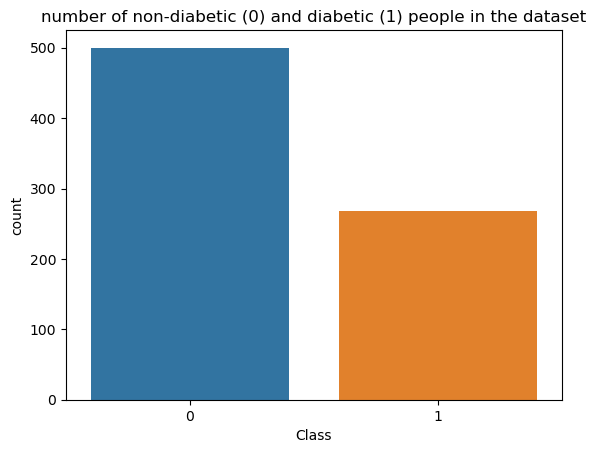

In [10]:
# Plot the Bar Plot on "Class" dependent variable.
sns.countplot(x="Class", data=diabetes_df)

# Set title of the plot
plt.title("number of non-diabetic (0) and diabetic (1) people in the dataset")

# Display all figures.
plt.show()

<b> In the above Barplot, we can see that the number of non-diabetic (0) is more as compare to number of diabetic (1).

<b> Checking the Empty cells / Missing values :
- The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [11]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

Here from the above code we first checked that is there any null values from the **IsNull()** function then we are going to take the sum of all those missing values from the **sum()** function and the inference we now get is that there are no missing values but that is actually not a true story as in **this particular dataset all the missing values were given the 0 as a value which is not good for the authenticity of the dataset.** Hence we will first **replace the 0 value with the NAN value** then start the imputation process.

<b> Here we are copying all the records from "diabetes_df" to another DataFrame as "diabetes_df_copy" and replacing the "0" value as "NaN" from the 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' variables.

In [12]:
# Copyong all the records from "diabetes_df" to another DataFrame as "diabetes_df_copy".
diabetes_df_copy = diabetes_df.copy(deep=True)

# Replacing the "0" value as "NaN".
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin',
                'BMI']] = diabetes_df_copy[['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

<b> Now again Checking the Empty cells / Missing values / Showing the Count of NANs :

In [13]:
diabetes_df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

<b> As mentioned above that now we will be replacing the zeros with the NAN values so that we can impute it later to maintain the authenticity of the dataset as well as trying to have a better Imputation approach i.e to apply mean values of each column to the null values of the respective columns.

<b> Now we are working with "diabetes_df" DataFrame, which is having a "0" value in some variables.

<b> Plotting the data distribution plots before removing null values:
    

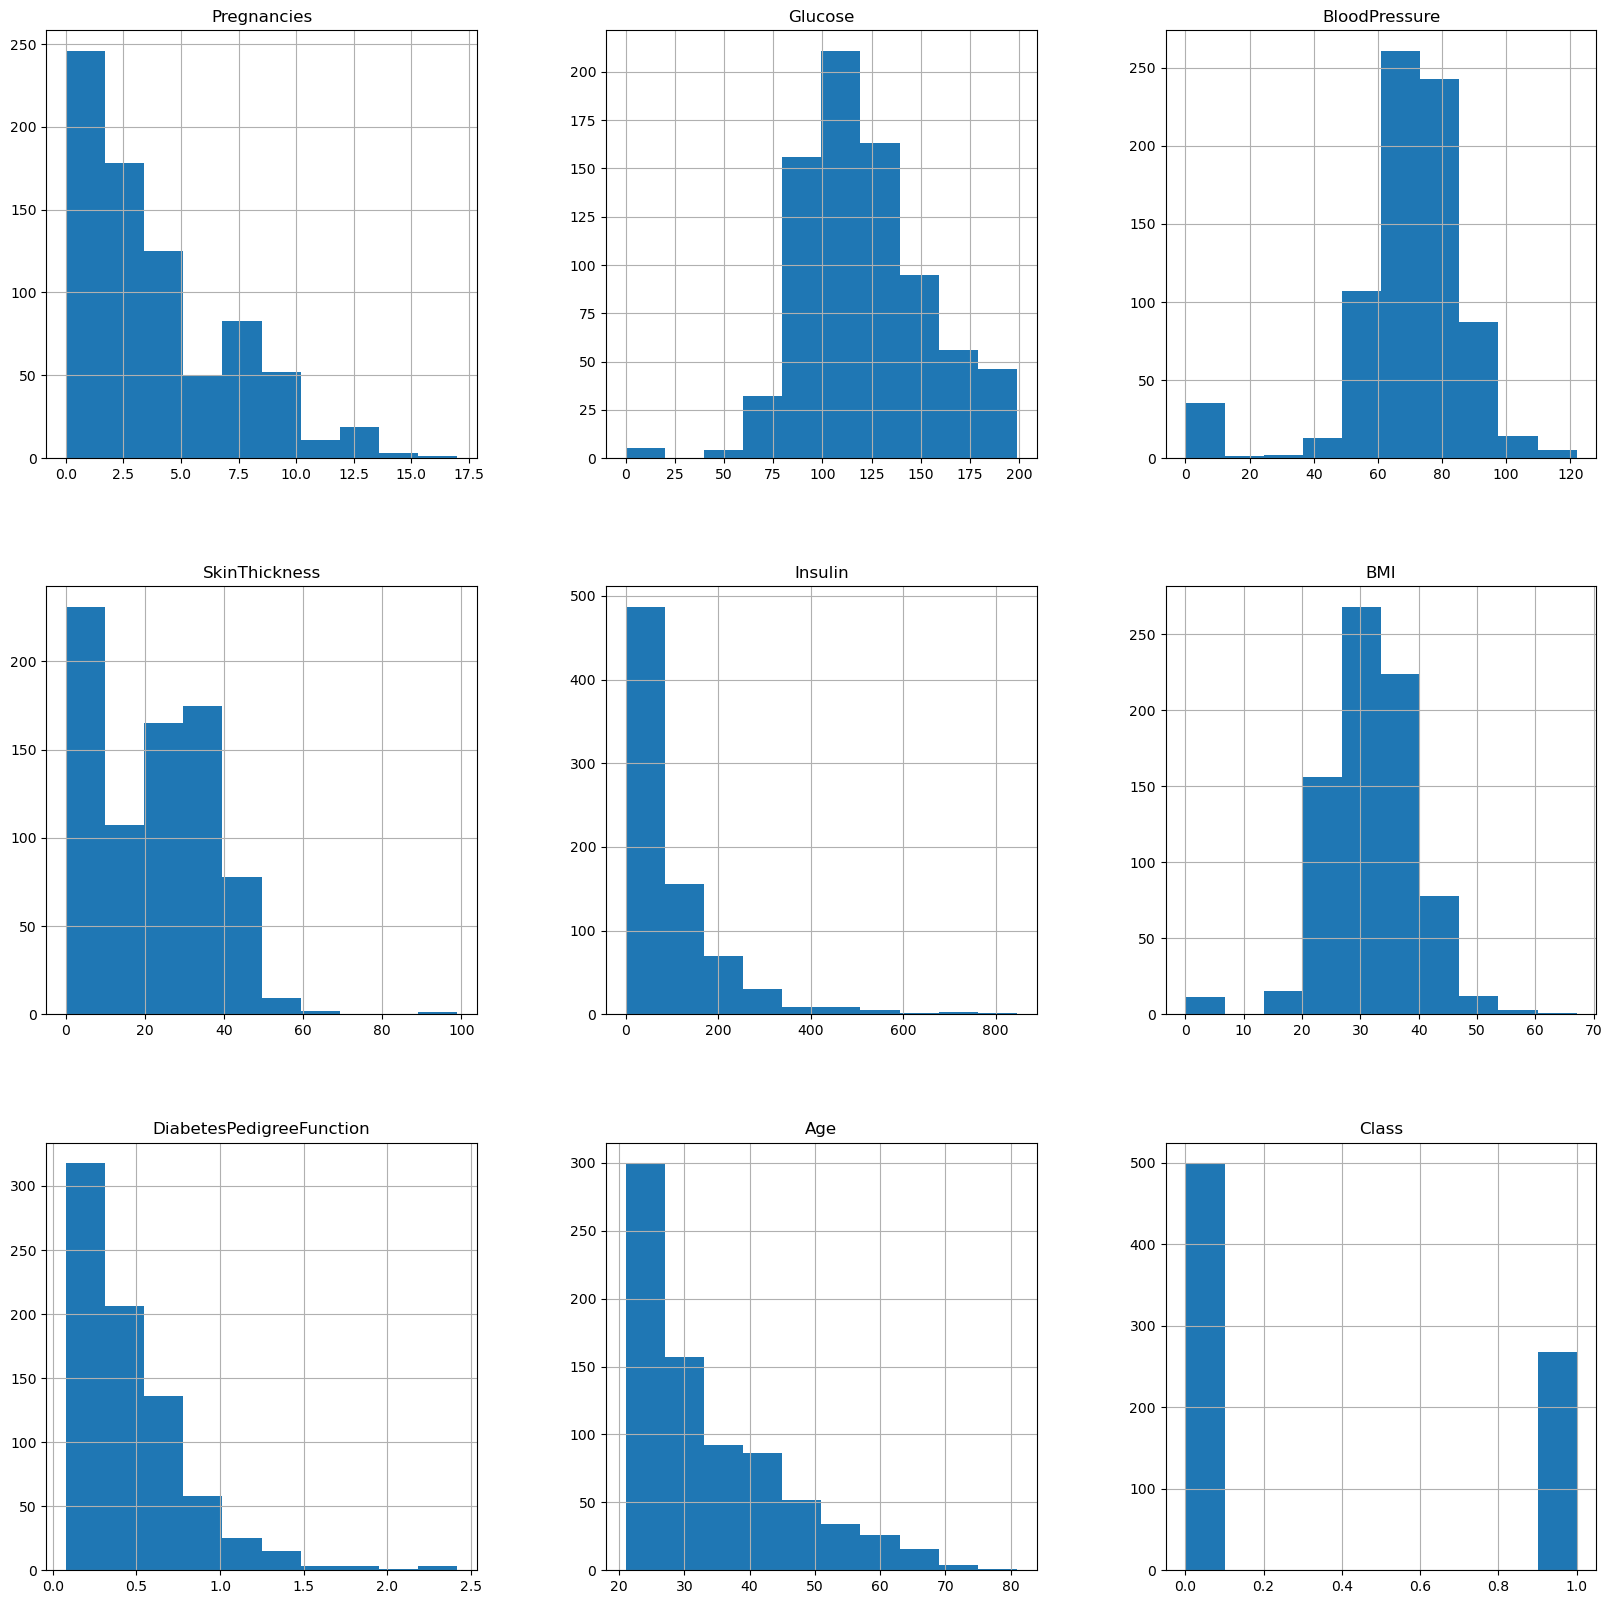

In [14]:
# Create the figure
diabetes_df.hist(figsize = (20,20))

# Display all figures.
plt.show()

<b> So here we have seen the distribution of each features whether it is dependent data or independent data and one thing which could always strike that why do we need to see the distribution of data? So the answer is simple it is the best way to start the analysis of the dataset as it shows the occurrence of every kind of value in the graphical structure which in turn lets us know the range of the data.
    
<b> Now we will be imputing the mean/median value of the column to each missing value of that particular column from "diabetes_df_copy" DataFrame.    

In [15]:
# imputing mean to "Glucose" variable
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
# imputing mean to "BloodPressure" variable
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
# imputing median to "SkinThickness" variable
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
# imputing median to "Insulin" variable
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
# imputing median to "BMI" variable
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

<b> Now again Checking the Empty cells / Missing values:

In [16]:
diabetes_df_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

<b> In the above, we can see that there is no missing values.
    
<b> Plotting the distributions after removing the NAN values.

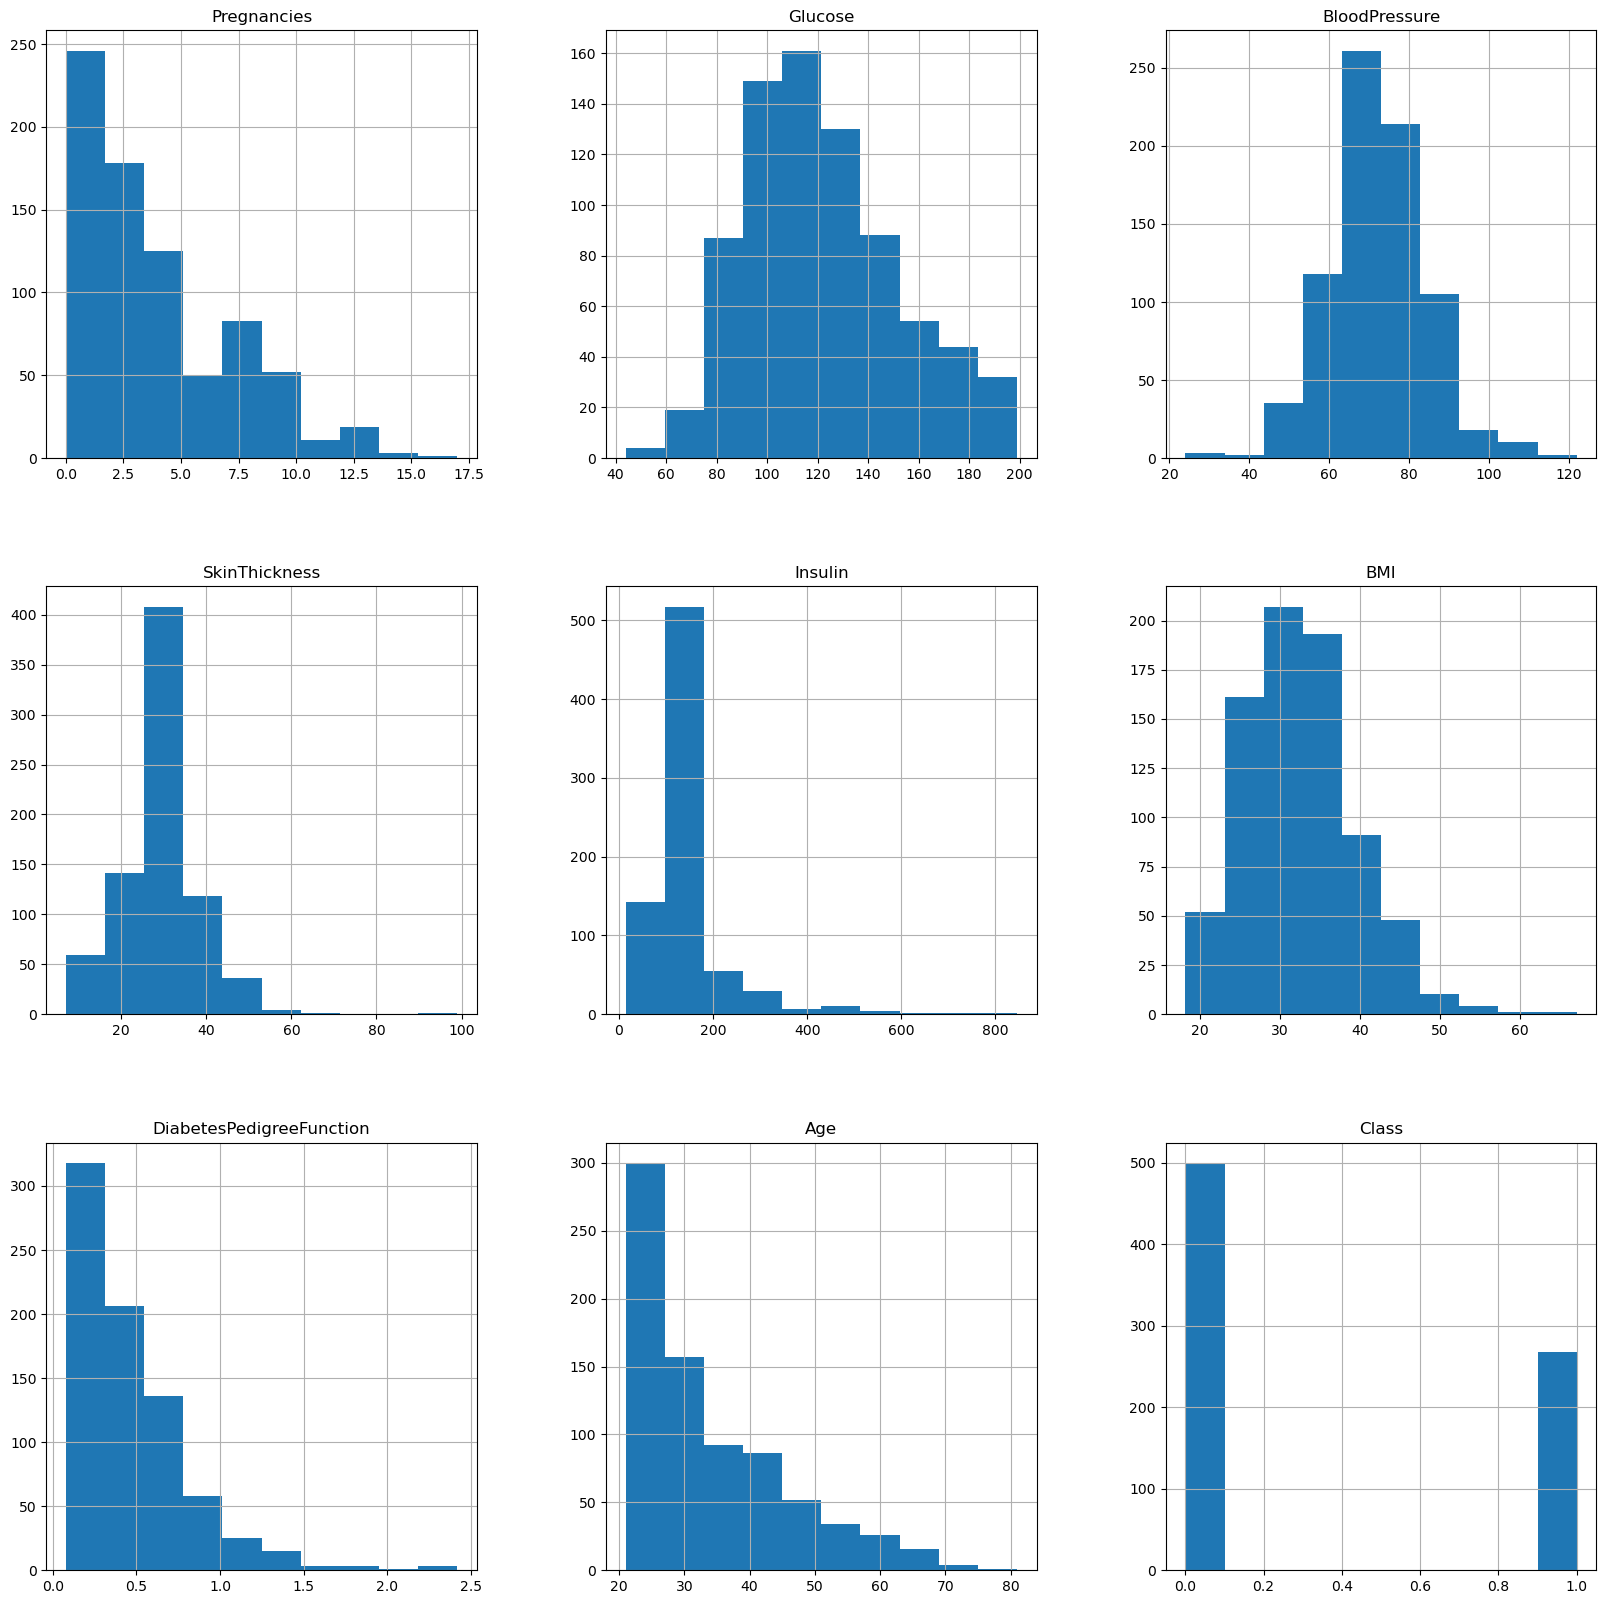

In [17]:
# Create the figure
diabetes_df_copy.hist(figsize = (20,20))

# Display all figures.
plt.show()

### 3.3 Train/Test Split
<b> Creating independent variables as "x" except "Class" variable and dependent variable "Class" as "y" variable.

In [18]:
# Create x and y variables.
X = diabetes_df.drop('Class', axis=1)
y = diabetes_df['Class']

<b> Now we will split the data into training and testing data using the train_test_split function, we have already imported the train_test_split function.

In [19]:
# Apply the train_test_split() function.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

## Creating the PipeLines:
<b> Creating Pipelines for KNN, SVM, Logistic Regression, Decision Tree, Random Forest and XGBoost Classifier Models.

## PipeLine Steps will include:
<b> 1. Scaling the Data using StandardScaler


<b> 2. Reducing dimensionality by using PCA


<b> 3. Training Respective Model's

In [20]:
# K-Nearest Neighbours (KNN) Pipeline
KNN_Pipeline = Pipeline([('scaler', StandardScaler()),('mypca',PCA(n_components=3)),('KNN',KNeighborsClassifier())])

In [21]:
# SVM Pipeline
SVM_Pipeline = Pipeline([('scaler', StandardScaler()),('mypca',PCA(n_components=3)),('SVC',SVC())])

In [22]:
# Logistic Regression Pipeline
LogisticRegression_Pipeline = Pipeline([('scaler', StandardScaler()),('mypca',PCA(n_components=3)),
                                                   ('Logistic_Regression',LogisticRegression())])

In [23]:
# Decision Tree Classifier Pipeline
DecisionTree_Pipeline = Pipeline([('scaler', StandardScaler()),('mypca',PCA(n_components=3)),
                                           ('Decision_Tree_Classifier',DecisionTreeClassifier())])

In [24]:
# Random Forest Classifier Pipeline
RandomForest_Pipeline = Pipeline([('scaler', StandardScaler()),('mypca',PCA(n_components=3)),
                                           ('Random_Forest_Classifier',RandomForestClassifier())])

In [25]:
# XGBClassifier Pipeline
XGBoost_Pipeline = Pipeline([('scaler', StandardScaler()),('mypca',PCA(n_components=3)),
                                           ('XGBClassifier',XGBClassifier())])

## Modelling and Evaluation:
<b> We have initialize the classifier models with their default parameters, now adding them to a model list with there names and initialize names.

In [26]:
# Adding the names and initialize_names(models) to list.
models = [('KNN', KNN_Pipeline),
         ('SVC', SVM_Pipeline),
         ('LR', LogisticRegression_Pipeline),
         ('DT', DecisionTree_Pipeline),
         ('XGBClassifier', XGBoost_Pipeline),
         ('RF', RandomForest_Pipeline)]

In [27]:
names = []                                                     # Initializing empty list of classifier names
Train_scores = []                                              # Initializing empty list of Train Accuaracy
Test_scores = []                                               # Initializing empty list of Test Accuracy
CV_Scores = []                                                 # Initializing empty list of CV Score

for name, model in models:                                     # Using for loop for iteration of name and models
    model.fit(X_train, y_train)                                # fitting the models with train data
    train_predictions = model.predict(X_train)                 # Predict on the train data set.
    test_predictions = model.predict(X_test)                   # Predict on the test data set.
    # cross_val_score = cross_val_score(model, x, y, cv=5).mean()
    Train_scores.append(accuracy_score(y_train, train_predictions))    # Adding train scores to Train_Score list
    Test_scores.append(accuracy_score(y_test, test_predictions))       # Adding test scores to Test_Score list
    CV_Scores.append(cross_val_score(model, X, y, cv=5).mean())        # Adding CV Score to CV_Score list
    names.append(name)                                                 # Adding classifier names to names list
    
# Creating DataFrame with classifier names, train scores, test scores and cv score    
tr_split = pd.DataFrame({'Name': names, 'Train_Score': Train_scores, 'Test_Score':Test_scores, 'CV_Score':CV_Scores})
print(tr_split)                                                # print the DataFrame

            Name  Train_Score  Test_Score  CV_Score
0            KNN     0.786645    0.733766  0.718759
1            SVC     0.757329    0.766234  0.737051
2             LR     0.723127    0.772727  0.721399
3             DT     1.000000    0.694805  0.652398
4  XGBClassifier     1.000000    0.759740  0.687548
5             RF     1.000000    0.720779  0.700569


<b> As we can see, the Decision Tree, Random Forest and XGBoost algorithm's with default parameter's are overfitted. The KNN, SVM and Logistic Regression alorithm's with default parameters are good model on train and test data sets. As comparing KNN, SVM and Logistic Regression alorithm's, the test accuracy of Logistic Regression alorithm is high.

<b> Logistic Regression with default parameters, the training set and testing set performances are comparable. From the above we conclude that, we have got a best model on train and test data sets. We got an train accuracy of 72.31%, test accuracy of 77.27%  and cross validate score of 72.21% with this model.
    